<a href="https://colab.research.google.com/github/me-keh/project/blob/main/elections_cartes_et_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import numpy as np

Importer les fichiers depuis tafra.ma/donnees

In [ ]:
#using header and requests to avoir 406 error

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}


In [ ]:
#importing several files from rferrali

url = "http://files.tafra.ma/communes-rgph-2014-1-0.xlsx"
req = requests.get(url, headers=headers)
open('temp.xlsx', 'wb').write(req.content)
RGPH = pd.read_excel('temp.xlsx',sheet_name='données')

url = "http://files.tafra.ma/parlement-elections-2011-1-0.xlsx"
req = requests.get(url, headers=headers)
open('temp.xlsx', 'wb').write(req.content)
leg21 = pd.read_excel('temp.xlsx',sheet_name='données')

url = "http://files.tafra.ma/communes-elections-2021-1-0.xlsx"
req = requests.get(url, headers=headers)
open('temp.xlsx', 'wb').write(req.content)
com21 = pd.read_excel('temp.xlsx',sheet_name='données')

In [ ]:
url = "http://files.tafra.ma/communes-elections-2015-1-0.xlsx"
req = requests.get(url, headers=headers)
open('temp.xlsx', 'wb').write(req.content)
com15 = pd.read_excel('temp.xlsx',sheet_name='données')

In [ ]:
url = "http://files.tafra.ma/communes-elus-2015-1-0.xlsx"

req = requests.get(url, headers=headers)
open('temp.xlsx', 'wb').write(req.content)
elus15 = pd.read_excel('temp.xlsx',sheet_name='données')

In [ ]:
url = "http://files.tafra.ma/communes-elus-2021-1-0.xlsx"

req = requests.get(url, headers=headers)
open('temp.xlsx', 'wb').write(req.content)
elus21 = pd.read_excel('temp.xlsx',sheet_name='données')

In [ ]:
url = "http://files.tafra.ma/parlement-elections-2016-1-1.xlsx"
req = requests.get(url, headers=headers)
open('temp.xlsx', 'wb').write(req.content)
leg16 = pd.read_excel('temp.xlsx',sheet_name='données')

In [ ]:
url = "http://files.tafra.ma/parlement-elections-2011-1-0.xlsx"
req = requests.get(url, headers=headers)
open('temp.xlsx', 'wb').write(req.content)
leg11 = pd.read_excel('temp.xlsx',sheet_name='données')

In [ ]:
url = "http://files.tafra.ma/parlement-questions-tafra-1-0.xlsx"
req = requests.get(url, headers=headers)
open('temp.xlsx', 'wb').write(req.content)
questions = pd.read_excel('temp.xlsx',sheet_name='donées')

In [ ]:
leg16['nbrVoix']=leg16[leg16['typeListe']=='locale'].iloc[:,15:-1].sum(axis=1)
leg16['corpsElec']=leg16['nbrVoix']/leg16['txParticipation']
casa=leg16[leg16['prefProv'].str.contains('Casa')]
part2016=casa['nbrVoix'].sum()/casa['corpsElec'].sum()

In [ ]:
leg11['nbrVoix']=leg11[leg11['typeListe']=='locale'].iloc[:,15:-1].sum(axis=1)
leg11['corpsElec']=leg11['nbrVoix']/leg11['txParticipation']
casa=leg11[leg11['prefProv'].str.contains('Casa')]
part2011=casa['nbrVoix'].sum()/casa['corpsElec'].sum()


total nombre de voix | parti arrivé en tête 2021

In [ ]:
com21['firstParty']=com21.iloc[:,23:-1].idxmax(axis=1)


In [ ]:
com21['voix']=com21.iloc[:,23:-1].sum(axis=1)

In [ ]:
elections21=pd.merge(RGPH[RGPH['sample']=='ensemble'].sort_values(by = 'idCommune'),
                     com21.sort_values(by = 'idCommune'),
                     on='idCommune')

In [ ]:
elections21=elections21.sort_values(by = 'txParticipation')

In [ ]:
list(RGPH.columns)

In [ ]:
com15.columns

Index(['idRegion', 'idWilaya', 'idPrefProv', 'idSousPref', 'idCommune',
       'region', 'wilaya', 'prefProv', 'sousPref', 'commune', 'nSieges',
       'nInscrits', 'txParticipation', 'pctNuls', 'AGD', 'AHD', 'FFD', 'MDS',
       'MP', 'NEO', 'PA', 'PAM', 'PAN', 'PCS', 'PDI', 'PDN', 'PE', 'PEDD',
       'PGV', 'PI', 'PJD', 'PLJS', 'PML', 'PPS', 'PRD', 'PRE', 'PRV', 'PSD',
       'PUD', 'RNI', 'SAP', 'SAP2', 'UC', 'UMD', 'USFP', 'firstParty', 'voix'],
      dtype='object')

total nombre de voix | parti arrivé en tête 2015

In [ ]:
com15['firstParty']=com15.iloc[:,14:-1].idxmax(axis=1)

In [ ]:
com15['voix']=com15.iloc[:,14:-1].sum(axis=1)

In [ ]:
elections15=pd.merge(RGPH[RGPH['sample']=='ensemble'].sort_values(by = 'idCommune'),
                     com15.sort_values(by = 'idCommune'),
                     on='idCommune')

In [ ]:
elections15=elections15.sort_values(by = 'txParticipation')

In [ ]:
elus15.head(1)

,idRegion,idWilaya,idPrefProv,idSousPref,idCommune,idCirconscription,region,wilaya,prefProv,sousPref,commune,circonscription,prenomNom,parti,teteDeListe,role
0,627,23,271,NaN,1135,10390,Beni-Mellal - Khénifra,Beni-Mellal - Khénifra,Azilal,NaN,Afourar,1,فيصل علام,PI,True,conseiller


In [ ]:
elus15[elus15['parti']=='PSU'].loc[:,['region','commune','teteDeListe','role']]

,region,commune,teteDeListe,role
111,Beni-Mellal - Khénifra,Ait M'Hamed,True,conseiller
120,Beni-Mellal - Khénifra,Ait M'Hamed,True,conseiller
125,Beni-Mellal - Khénifra,Ait Majden,True,vice secrétaire du conseil
315,Beni-Mellal - Khénifra,Azilal (Mun.),False,conseiller
333,Beni-Mellal - Khénifra,Azilal (Mun.),False,conseiller
...,...,...,...,...
26892,Souss - Massa,Oulad Aissa,True,conseiller
26893,Souss - Massa,Oulad Aissa,False,conseiller
27265,Souss - Massa,Taliouine (Mun.),False,conseiller
27266,Souss - Massa,Taliouine (Mun.),True,conseiller


In [ ]:
elus21[elus21['parti']=='PSU'].loc[:,['region','commune','teteDeListe','role']]

,region,commune,teteDeListe,role
348,Beni-Mellal - Khénifra,Azilal (Mun.),1,conseiller
349,Beni-Mellal - Khénifra,Azilal (Mun.),0,conseiller
537,Beni-Mellal - Khénifra,Moulay Aissa Ben Driss,1,conseiller
785,Beni-Mellal - Khénifra,Taounza,1,conseiller
956,Beni-Mellal - Khénifra,Béni Mellal (Mun.),1,conseiller
...,...,...,...,...
32062,Tanger - Tétouan - Al Hoceima,Tanger-Médina (Arrond.),1,conseiller
32074,Tanger - Tétouan - Al Hoceima,Tanger-Médina (Arrond.),0,conseiller
32381,Tanger - Tétouan - Al Hoceima,Sahtryine,1,secrétaire du conseil
32407,Tanger - Tétouan - Al Hoceima,Tétouan (Mun.),1,conseiller


In [ ]:
RGPH[RGPH['sample']=='ensemble'].loc[:,['commune','popLegale','ageMarie']]

,commune,popLegale,ageMarie
0,Afourar,21382.0,28.104600
12,Agoudi N'Lkhair,11752.0,26.527607
25,Ait Abbas,12633.0,22.303534
34,Ait Blal,7770.0,25.297796
39,Ait Bou Oulli,11095.0,23.885548
...,...,...,...
13797,Souk Kdim,7823.0,30.308245
13806,Tétouan (Mun.),380787.0,30.106488
13815,Zaitoune,10481.0,28.538121
13824,Zaouiat Sidi Kacem,11537.0,28.401988


In [ ]:
RGPH=RGPH[RGPH['sample']=='ensemble']

In [ ]:
df21=pd.merge(elus21,RGPH,left_on="idCommune",right_on="idCommune",how='left')
df15=pd.merge(elus15,RGPH,left_on="idCommune",right_on="idCommune",how='left')

In [ ]:
df15[df15['parti']=='PSU'].drop_duplicates(subset=['idCommune']).loc[:,['ageMarie','tailleMenage','eduSup','txAnalphabetisme']].describe()


,ageMarie,tailleMenage,eduSup,txAnalphabetisme
count,66.000000,66.000000,66.000000,66.000000
mean,27.760950,5.125209,0.038012,0.422064
std,2.038677,0.839674,0.054638,0.116987
min,23.688548,3.302826,0.004508,0.075020
25%,26.233381,4.476889,0.015456,0.352253
50%,27.505140,5.039483,0.023191,0.436336
75%,29.220888,5.673460,0.044365,0.508660
max,34.164465,7.786585,0.428197,0.700366


In [ ]:
df21[df21['parti']=='PSU'].drop_duplicates(subset=['idCommune']).loc[:,['ageMarie','tailleMenage','eduSup','txAnalphabetisme']].describe()

,ageMarie,tailleMenage,eduSup,txAnalphabetisme
count,64.000000,64.000000,64.000000,64.000000
mean,29.279026,4.409191,0.078057,0.286182
std,1.789962,0.540322,0.052680,0.111897
min,25.693568,3.389051,0.004319,0.113961
25%,28.259702,4.091932,0.042952,0.209935
50%,29.310291,4.259740,0.075026,0.256700
75%,30.135002,4.603173,0.104914,0.346800
max,34.393267,6.179666,0.292584,0.592701


In [ ]:
df15[df15['parti']=='PJD'].drop_duplicates(subset=['idCommune']).loc[:,['ageMarie','tailleMenage','eduSup','txAnalphabetisme']].describe()

,ageMarie,tailleMenage,eduSup,txAnalphabetisme
count,897.000000,897.000000,897.000000,897.000000
mean,28.067334,5.120720,0.032108,0.416139
std,1.917469,0.963192,0.038154,0.122532
min,22.303534,1.777778,0.000000,0.075020
25%,26.717393,4.460405,0.010294,0.322510
50%,27.825515,4.980739,0.018343,0.434996
75%,29.335356,5.629097,0.043180,0.506638
max,35.615665,10.898148,0.428197,0.856894


In [ ]:
df21[df21['parti']=='PJD'].drop_duplicates(subset=['idCommune']).loc[:,['ageMarie','tailleMenage','eduSup','txAnalphabetisme']].describe()

,ageMarie,tailleMenage,eduSup,txAnalphabetisme
count,305.000000,305.000000,305.000000,305.000000
mean,28.288446,4.954555,0.048525,0.360739
std,1.879450,1.009700,0.051243,0.132968
min,22.303534,3.263151,0.000939,0.075020
25%,26.888510,4.271570,0.013419,0.249154
50%,28.284117,4.679362,0.031607,0.347774
75%,29.612189,5.454150,0.068689,0.468911
max,35.615665,10.898148,0.428197,0.687399


In [ ]:
com15RGPH=pd.merge(com15,RGPH,left_on="idCommune",right_on="idCommune",how='left')
com21RGPH=pd.merge(com21,RGPH,left_on="idCommune",right_on="idCommune",how='left')


Communes où le PSU se présente

In [ ]:
com21RGPH[com21RGPH['PSU']>0].drop_duplicates(subset=['idCommune']).loc[:,['ageMarie','tailleMenage','eduSup','txAnalphabetisme']].describe()

,ageMarie,tailleMenage,eduSup,txAnalphabetisme
count,231.000000,231.000000,231.000000,231.000000
mean,28.611056,4.752478,0.051674,0.358606
std,1.828610,0.719232,0.047351,0.129122
min,22.981968,3.149941,0.002726,0.106538
25%,27.311526,4.231007,0.016985,0.248754
50%,28.511605,4.575258,0.036786,0.353286
75%,29.880681,5.154305,0.076072,0.464388
max,34.393267,7.324289,0.346918,0.630201


In [ ]:
com21RGPH[com21RGPH['PSU']>0].drop_duplicates(subset=['idCommune']).loc[:,['ageMarie','tailleMenage','eduSup','txAnalphabetisme']].describe()

,ageMarie,tailleMenage,eduSup,txAnalphabetisme
count,231.000000,231.000000,231.000000,231.000000
mean,28.611056,4.752478,0.051674,0.358606
std,1.828610,0.719232,0.047351,0.129122
min,22.981968,3.149941,0.002726,0.106538
25%,27.311526,4.231007,0.016985,0.248754
50%,28.511605,4.575258,0.036786,0.353286
75%,29.880681,5.154305,0.076072,0.464388
max,34.393267,7.324289,0.346918,0.630201


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


matrice de corrélation de résultats

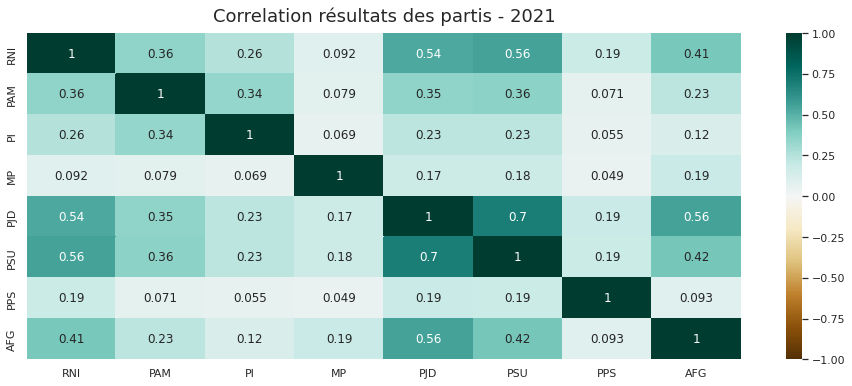

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap( com21.loc[:,['RNI','PAM','PI','MP','PJD','PSU','PPS','AFG']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation résultats des partis - 2021', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=400, bbox_inches='tight')

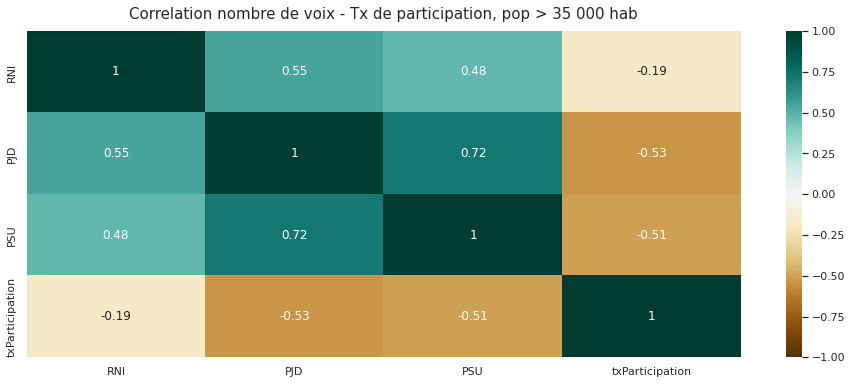

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap( com21RGPH[com21RGPH['popLegale']>35000].loc[:,['RNI','PJD','PSU','txParticipation']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation nombre de voix - Tx de participation, pop > 35 000 hab', fontdict={'fontsize':15}, pad=12)
plt.savefig('heatmapTxParticipation.png', dpi=400, bbox_inches='tight')

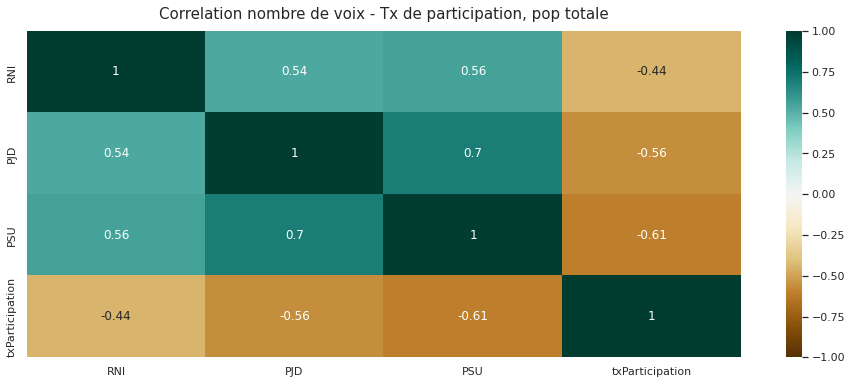

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap( com21RGPH[com21RGPH['popLegale']>0].loc[:,['RNI','PJD','PSU','txParticipation']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation nombre de voix - Tx de participation, pop totale', fontdict={'fontsize':15}, pad=12)
plt.savefig('heatmapTxParticipation.png', dpi=400, bbox_inches='tight')

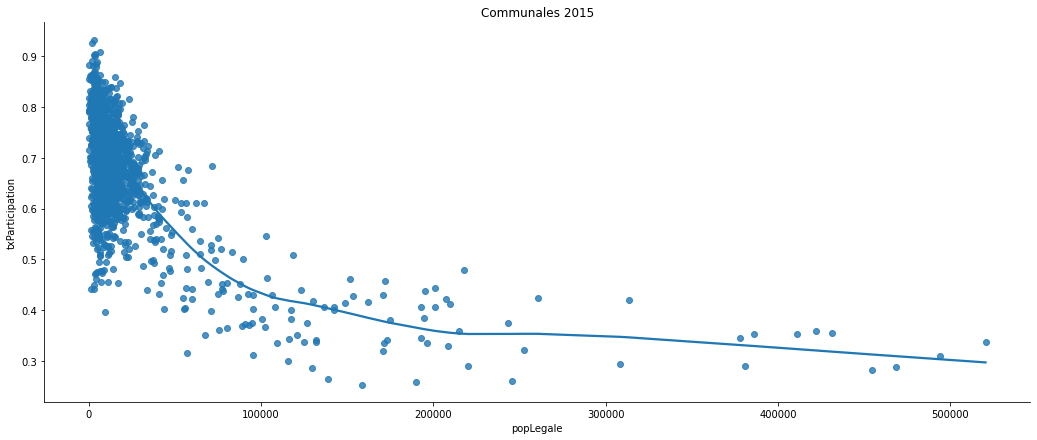

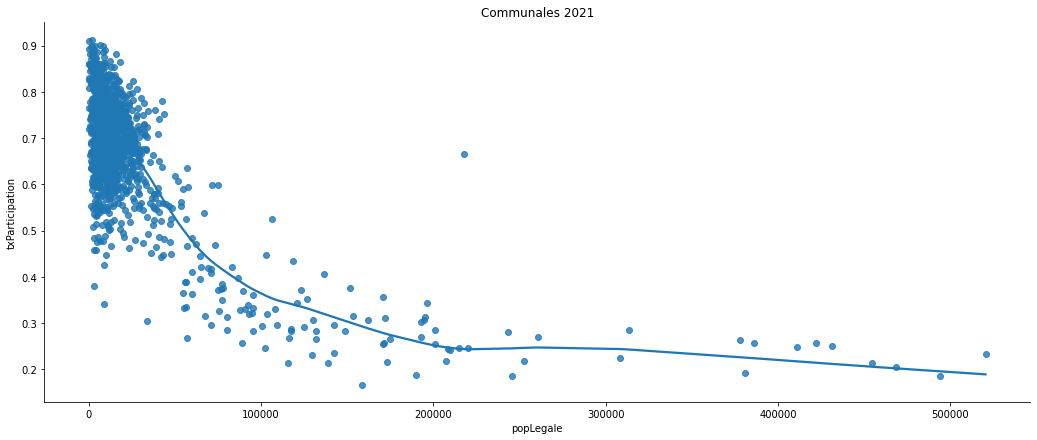

In [ ]:
sns.lmplot(y="txParticipation", x="popLegale", data=elections15,
            lowess=True,
            height=6, aspect=20/8.27)
ax = plt.gca()
ax.set_title("Communales 2015")

sns.lmplot(y="txParticipation", x="popLegale", data=elections21,
            lowess=True,
            height=6, aspect=20/8.27)
ax = plt.gca()
ax.set_title("Communales 2021")
 
plt.show()

In [ ]:
sns.lmplot(y="txParticipation", x="popLegale", data=elections15,
            lowess=True, col='firstParty', col_wrap=1,
            height=6, aspect=20/8.27)

plt.show()

#sns.lmplot(y="txParticipation", x="popLegale", data=elections21,
#            lowess=True, col='firstParty', col_wrap=1,
#            height=6, aspect=20/8.27)
#plt.title("Communales 2021, parti arrivé en tête") 
#plt.show()

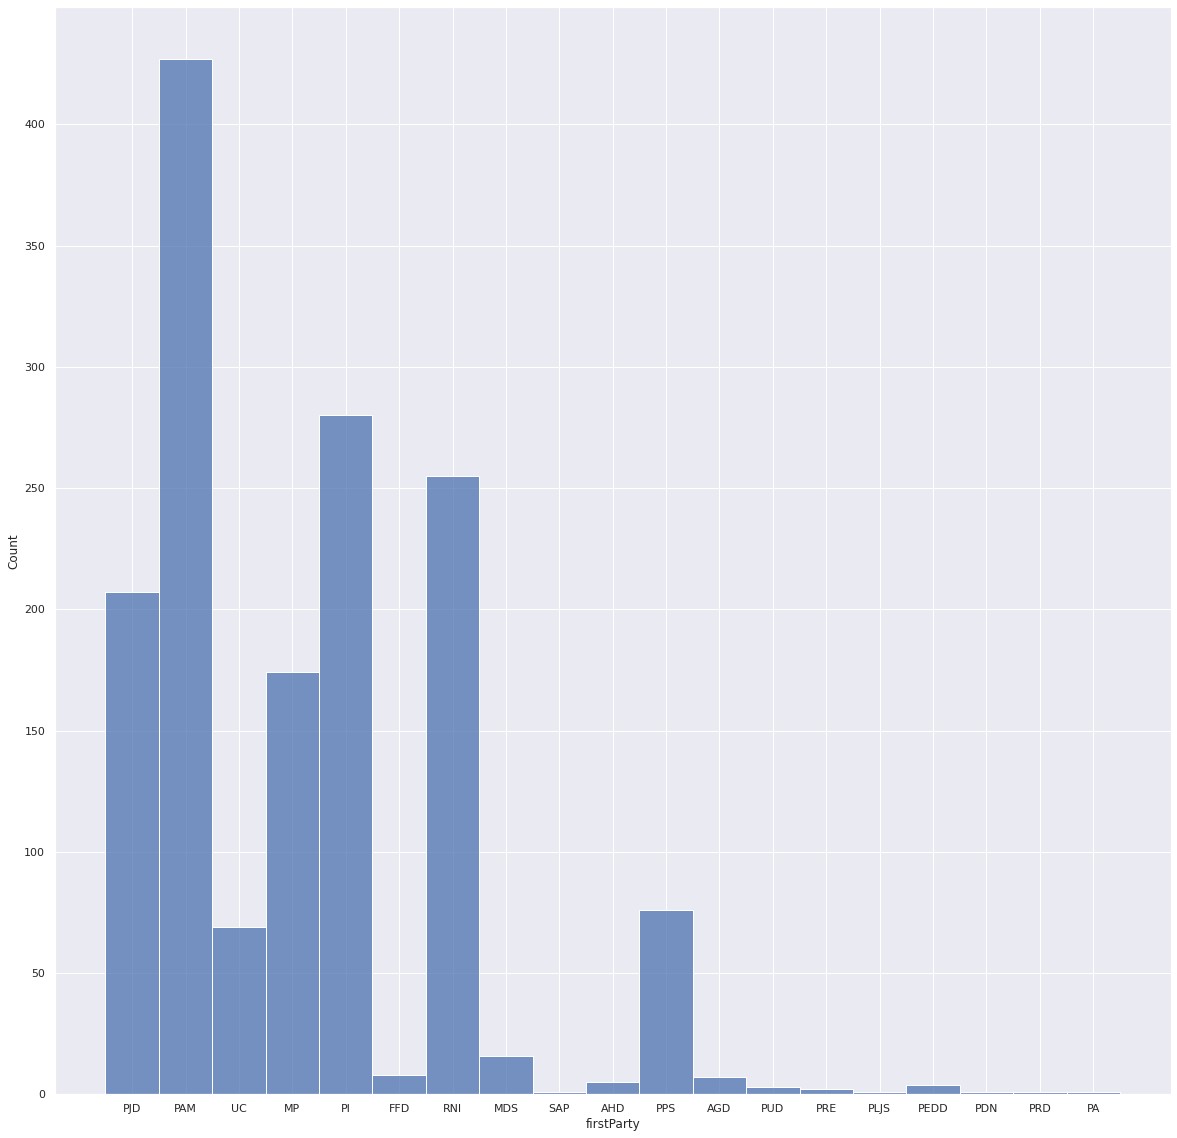

In [ ]:
sns.histplot(data=elections15, x="firstParty")
plt.show()

Text(0.5, 1.0, 'COMMUNALES 2021')

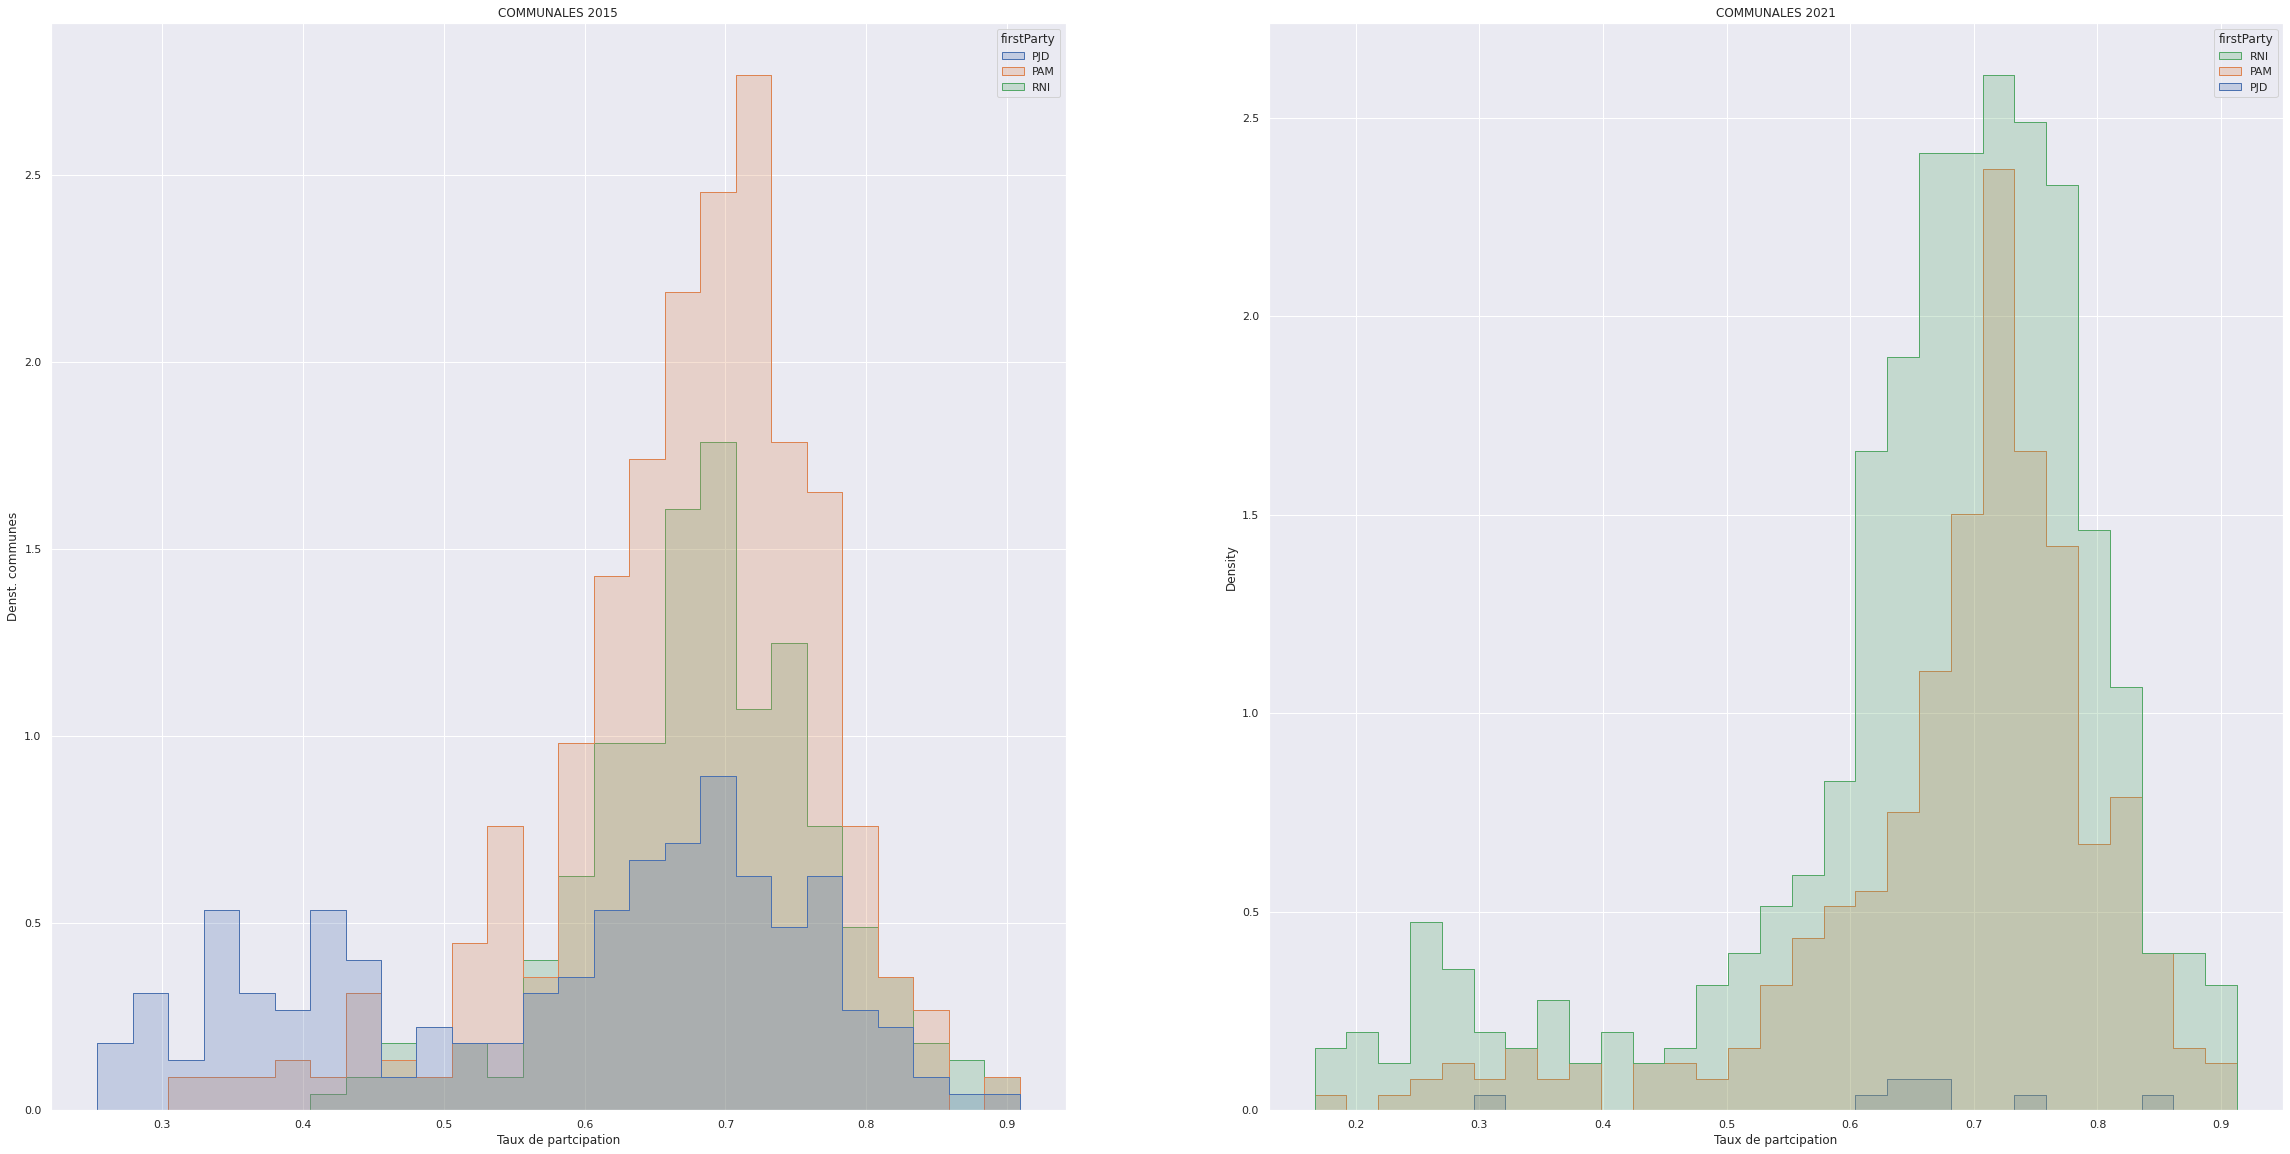

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.set(rc={'figure.figsize':(20,20)})


sns.histplot(
    elections15[elections15['firstParty'].isin(['RNI','PAM','PJD'])],
    x="txParticipation", hue="firstParty", element="step",
    stat="density",  ax=ax[0], palette=["C0", "C1", "C2"]
)



sns.histplot(
    elections21[elections21['firstParty'].isin(['RNI','PAM','PJD'])],
    x="txParticipation", hue="firstParty", element="step",
    stat="density",   ax=ax[1], palette=["C2", "C1", "C0"]
)

ax[0].set_xlabel("Taux de partcipation")
ax[0].set_ylabel("Denst. communes")
ax[0].set_title('COMMUNALES 2015')
ax[1].set_xlabel("Taux de partcipation")
ax[1].set_title('COMMUNALES 2021')




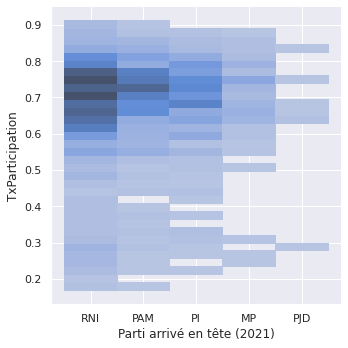

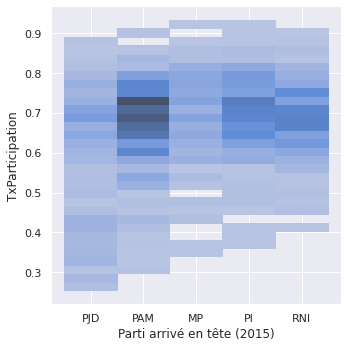

In [ ]:

g=sns.displot( elections21[elections21['firstParty'].isin(['RNI','PAM','PI','MP','PJD'])],
            x="firstParty", y="txParticipation", log_scale=(False, False))

g.set_axis_labels("Parti arrivé en tête (2021)", "TxParticipation")
plt.show()

g=sns.displot( elections15[elections15['firstParty'].isin(['RNI','PAM','PI','MP','PJD'])],
            x="firstParty", y="txParticipation", log_scale=(False, False),)
g.set_axis_labels("Parti arrivé en tête (2015)", "TxParticipation")
plt.show()

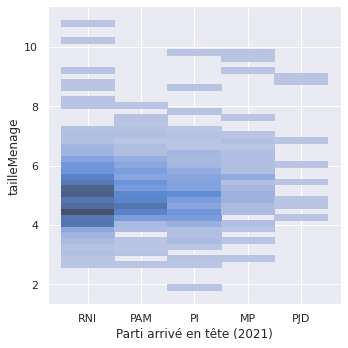

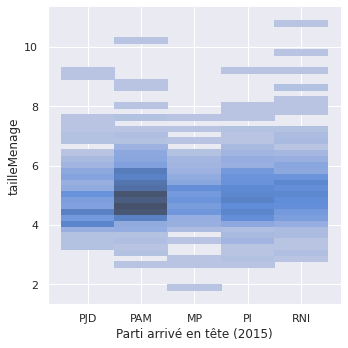

In [ ]:

g=sns.displot( elections21[elections21['firstParty'].isin(['RNI','PAM','PI','MP','PJD'])],
            x="firstParty", y="tailleMenage", log_scale=(False, False))

g.set_axis_labels("Parti arrivé en tête (2021)")
plt.show()


g=sns.displot( elections15[elections15['firstParty'].isin(['RNI','PAM','PI','MP','PJD'])],
            x="firstParty", y="tailleMenage", log_scale=(False, False))

g.set_axis_labels("Parti arrivé en tête (2015)")
plt.show()

In [ ]:
%pip install geopandas
import geopandas as gpd
import zipfile


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.3 MB/s 
     |████████████████████████████████| 16.7 MB 216 kB/s 
     |████████████████████████████████| 6.3 MB 30.7 MB/s 


In [ ]:
url = "http://files.tafra.ma/shp/communes/communes2014.zip"
req = requests.get(url, headers=headers)
open('communes2014.zip', 'wb').write(req.content)

with zipfile.ZipFile("communes2014.zip","r") as zip_ref:
    zip_ref.extractall("/content")

bmap = gpd.read_file('communes2014.shp')


In [ ]:
import geopandas as gpd

bmap = gpd.read_file('communes2014.shp')

df = com21
bmap=bmap.rename(columns={"idUnit": "idCommune"})
geo_df21 = bmap.merge(df, on="idCommune").set_index("idCommune")



df['firstMajorParty'] = np.where(~df['firstParty'].isin(['RNI','PJD','PAM','PI','PSU']), df['firstParty'], 'Other')



In [ ]:
df['firstMajorParty'] = np.where(~df['firstParty'].isin(['RNI','PJD','PAM','PI','PSU']),'Other', df['firstParty'])
geo_df21 = bmap.merge(df, on="idCommune").set_index("idCommune")

majorParties= ['RNI','PJD','PAM','PI','PSU', 'Other']

majorPartiesColors=['#81d2f5', '#2e3490', '#e1f4fd', '#ffbbdb', 'FF0000' '#DCDCDC']

colorMap=dict(zip(majorParties,majorPartiesColors))
colorlist=['#DCDCDC','#e1f4fd','#ffbbdb','#2e3490','#81d2f5']
#geo_df21['color']=geo_df['firstMajorParty'].map(colorMap)




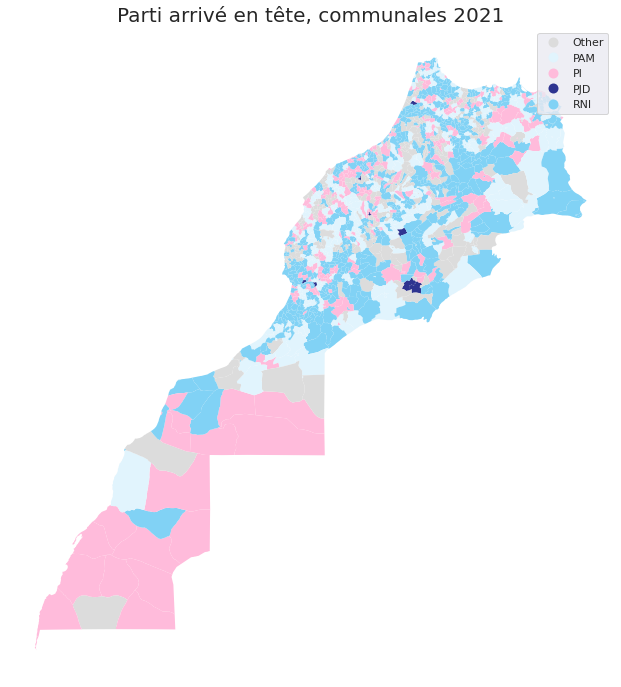

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors

geo_df21.plot(column='firstMajorParty',
            figsize=(12,12),linewidth=0,
            cmap=colors.ListedColormap(colorlist),legend=True)


# plt.xlim(-130,-60)
# plt.ylim(20,55)
plt.title('Parti arrivé en tête, communales 2021',fontsize=20)
plt.axis('Off')

plt.show()

In [ ]:
df=[]
geo_df=[]

In [ ]:
df = com15
#bmap=bmap.rename(columns={"idUnit": "idCommune"})
geo_df = bmap.merge(df, on="idCommune").set_index("idCommune")

df['firstMajorParty'] = np.where(~df['firstParty'].isin(['RNI','PJD','PAM','PI']), df['firstParty'], 'Other')



In [ ]:
df['firstMajorParty'] = np.where(~df['firstParty'].isin(['RNI','PJD','PAM','PI']),'Other', df['firstParty'])
geo_df = bmap.merge(df, on="idCommune").set_index("idCommune")

majorParties=      ['RNI'    ,'PJD'     ,'PAM'    ,'PI'       , 'Other']

majorPartiesColors=['#81d2f5', '#2e3490', '#e1f4fd', '#ffbbdb', '#DCDCDC']

colorlist=['#DCDCDC','#e1f4fd','#ffbbdb','#2e3490','#81d2f5']

colorMap=dict(zip(majorParties,majorPartiesColors))
geo_df['color']=geo_df['firstMajorParty'].map(colorMap)




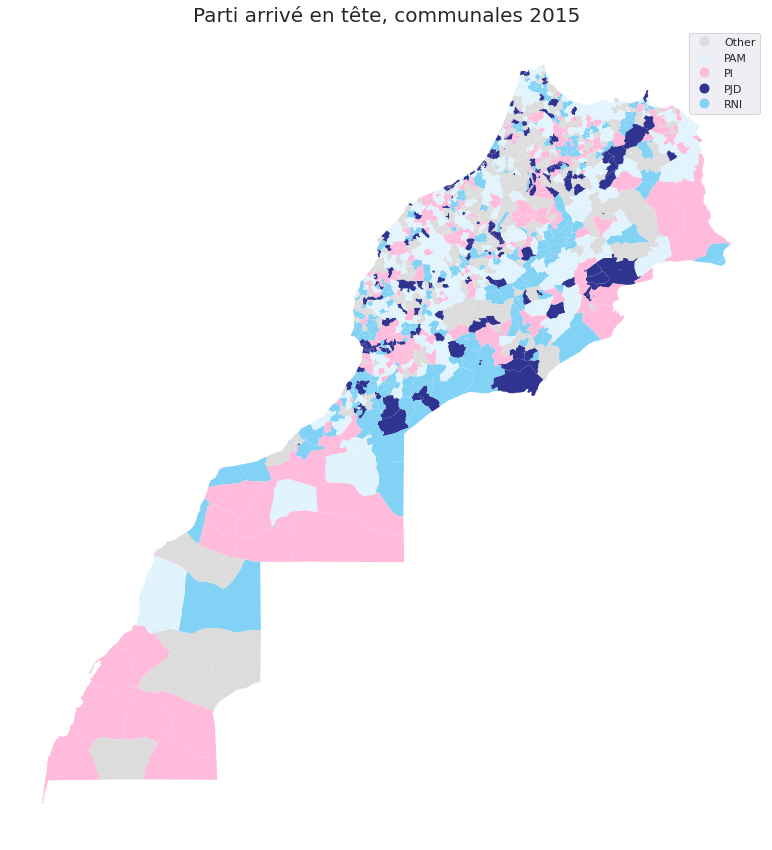

In [ ]:
geo_df.plot(column='firstMajorParty',
            figsize=(15,15),linewidth=0,
            cmap=colors.ListedColormap(colorlist),legend=True)


# plt.xlim(-130,-60)
# plt.ylim(20,55)
plt.title('Parti arrivé en tête, communales 2015',fontsize=20)
plt.axis('Off')

plt.show()




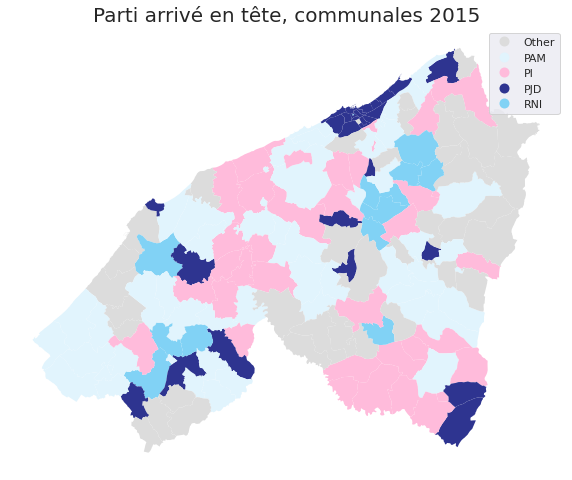

In [ ]:
geo_df_casa15=geo_df[geo_df['idRegion']==628]


geo_df_casa15.plot(column='firstMajorParty',
            figsize=(10,10),linewidth=0,
            cmap=colors.ListedColormap(colorlist),legend=True)


# plt.xlim(-130,-60)
# plt.ylim(20,55)
plt.title('Parti arrivé en tête, communales 2015',fontsize=20)
plt.axis('Off')

plt.show()

In [ ]:
list(geo_df21.columns)

In [ ]:
geo_df_casa21.loc[i,'centroid'].x

-909327.0375111152

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


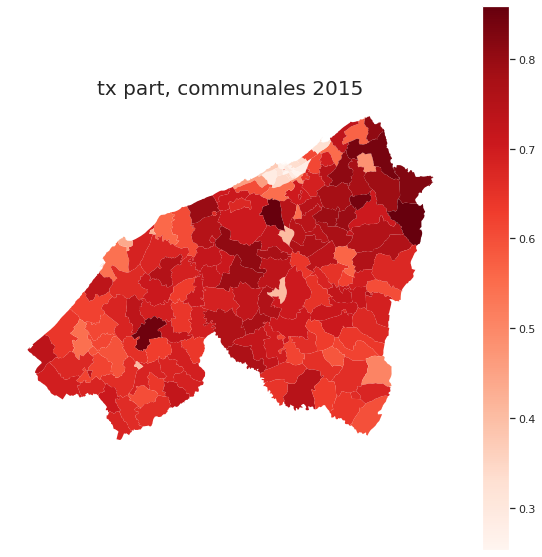

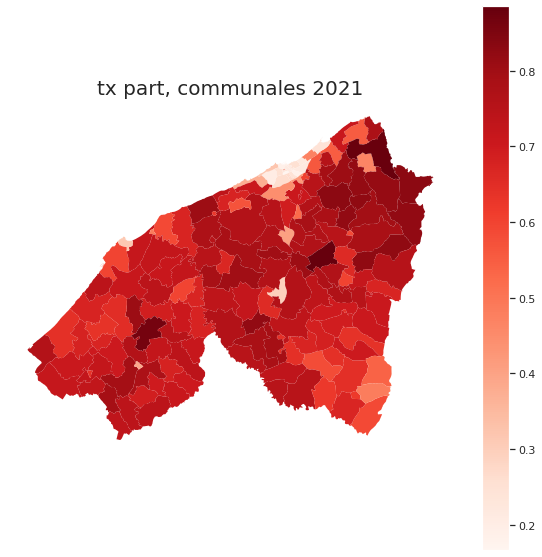

In [ ]:
geo_df_casa15=geo_df[geo_df['idRegion']==628]
geo_df_casa21=geo_df21[geo_df['idRegion']==628]

geo_df_casa21['centroid']=geo_df_casa21.centroid

geo_df_casa15.plot(column='txParticipation',
            figsize=(10,10),linewidth=0,
            legend=True,cmap='Reds')
plt.title('tx part, communales 2015',fontsize=20)
plt.axis('Off')

ax=geo_df_casa21.plot(column='txParticipation',
            figsize=(10,10),linewidth=0,
            legend=True,cmap='Reds')

# plt.xlim(-130,-60)
# plt.ylim(20,55)
plt.title('tx part, communales 2021',fontsize=20)
plt.axis('Off')

# for i in list(geo_df_casa21['prefProv_x'].unique()):
#   if geo_df_casa21.loc[i,'popLegale']>200000:
#     ax.annotate(geo_df_casa21.loc[i,'prefProv_x'], xy=[geo_df_casa21.loc[i,'centroid'].x,geo_df_casa21.loc[i,'centroid'].y])


plt.show()

Resultats Casa - PSU

In [ ]:
bmap = gpd.read_file('communes2014.shp')
bmap=bmap.rename(columns={"idUnit": "idCommune"})

In [ ]:
df = elections15
geo_df15 = bmap.merge(df, on="idCommune").set_index("idCommune")

geo_df_casa15=geo_df15[geo_df15['idPrefProv_x']==245]
geo_df_casa15['centroid']=geo_df_casa15.centroid

In [ ]:
ax=geo_df_casa15.plot(column='AGD',
            figsize=(20,10),linewidth=0,
            legend=True,cmap='Reds')

plt.title('score AGD, communales 2015',fontsize=20)
plt.axis('Off')



for i in list(geo_df_casa15.index):
  if geo_df_casa21.loc[i,'popLegale']>150000:
    ax.annotate(geo_df_casa15.loc[i,'commune_x'], xy=[geo_df_casa15.loc[i,'centroid'].x,geo_df_casa15.loc[i,'centroid'].y])


plt.show()

In [ ]:
df = elections21
geo_df21 = bmap.merge(df, on="idCommune").set_index("idCommune")

geo_df_casa21=geo_df21[geo_df21['idPrefProv_x']==245]
geo_df_casa21['centroid']=geo_df_casa21.centroid

In [ ]:
ax=geo_df_casa21.plot(column='PSU',
            figsize=(20,10),linewidth=0,
            legend=True,cmap='Reds')

plt.title('score PSU, communales 2021',fontsize=20)
plt.axis('Off')



for i in list(geo_df_casa21.index):
  if geo_df_casa21.loc[i,'popLegale']>150000:
    ax.annotate(geo_df_casa21.loc[i,'commune_x'], xy=[geo_df_casa21.loc[i,'centroid'].x,geo_df_casa21.loc[i,'centroid'].y])


plt.show()

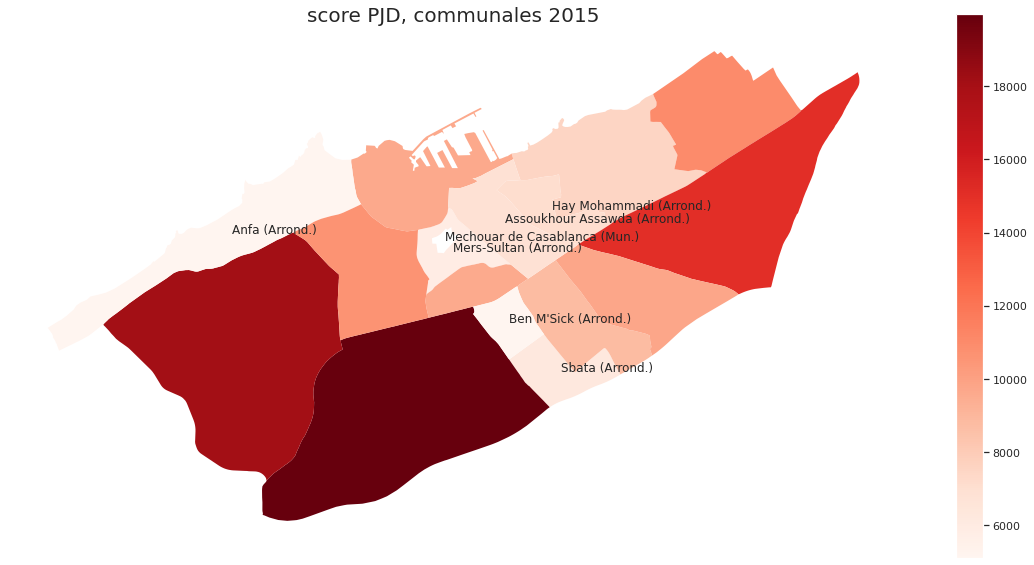

In [ ]:
ax=geo_df_casa15.plot(column='PJD',
            figsize=(20,10),linewidth=0,
            legend=True,cmap='Reds')

plt.title('score PJD, communales 2015',fontsize=20)
plt.axis('Off')



for i in list(geo_df_casa15.index):
  if geo_df_casa21.loc[i,'popLegale']<150000:
    ax.annotate(geo_df_casa15.loc[i,'commune_x'], xy=[geo_df_casa15.loc[i,'centroid'].x,geo_df_casa15.loc[i,'centroid'].y])


plt.show()

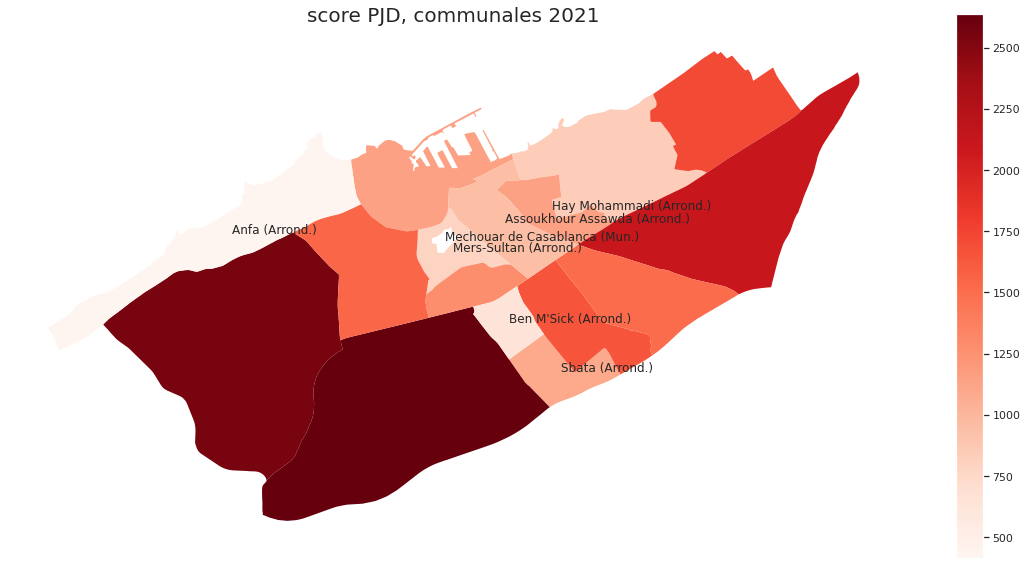

In [ ]:
ax=geo_df_casa21.plot(column='PJD',
            figsize=(20,10),linewidth=0,
            legend=True,cmap='Reds')

plt.title('score PJD, communales 2021',fontsize=20)
plt.axis('Off')



for i in list(geo_df_casa21.index):
  if geo_df_casa21.loc[i,'popLegale']<150000:
    ax.annotate(geo_df_casa21.loc[i,'commune_x'], xy=[geo_df_casa21.loc[i,'centroid'].x,geo_df_casa21.loc[i,'centroid'].y])


plt.show()